# Lasso Regression + Bagging

In [ ]:
#All imports
import pandas as pd
from sklearn.linear_model import Lasso
import random
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

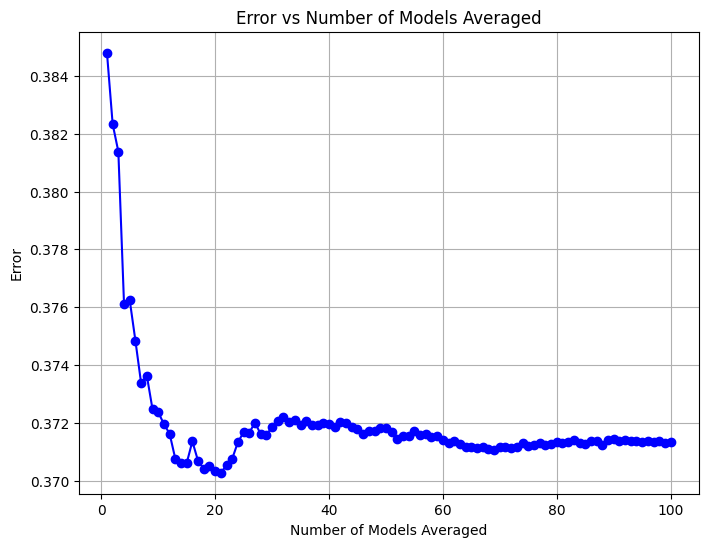

In [ ]:
# Read the data from the CSV file
data = pd.read_csv('/Houseprice_data_scaled.csv')

X = data.drop('Sale Price', axis=1)  # Features
y = data['Sale Price']  # Target variable

num_models = 100
num_data_points = 900

lasso_models = []
lasso_models = []

# Create 100 Lasso models
for i in range(100):
    random.seed(i)  # seed for reproducibility

    # Randomly sample 900 data points without replacement
    indices = random.sample(range(len(X)), 900)
    X_sample = X.iloc[indices]
    y_sample = y.iloc[indices]

    # Fit Lasso model with alpha=0.05
    lasso = Lasso(alpha=0.05)
    lasso.fit(X_sample, y_sample)
    lasso_models.append(lasso)

errors = []

ensemble_prediction = np.zeros(len(y))
for i, model in enumerate(lasso_models):
    ensemble_prediction += model.predict(X)
    error = np.std(y - ensemble_prediction / (i + 1))  # Calculate error
    errors.append(error)

# Plotting the error as a function of the number of models averaged
plt.figure(figsize=(8, 6))
plt.grid(True)
plt.plot(range(1, len(lasso_models) + 1), errors, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Models Averaged')
plt.ylabel('Error')
plt.title('Error vs Number of Models Averaged')
plt.show()



Bagging is the process of sampling with replacement in order to make new data sets. We see that as the ammount of simulated models created by taking a random subset of 900 points out of the original dataset we see that the error decrease.

# Decision Tree Regressor

In [1]:
# Read the data from the Excel file
data = pd.read_excel('/Data_DecisionTree.xlsx')

# Sort the data based on Quality and Area columns
data = data.sort_values(by=['Qual', 'Area'])

# Calculate MSE for different thresholds of 'Quality'
mse_quality = []
for threshold in data['Qual']:
    left_branch = data[data['Qual'] <= threshold]
    right_branch = data[data['Qual'] > threshold]

    if not left_branch.empty:
        mse_left = mean_squared_error(left_branch['Price'], [left_branch['Price'].mean()] * len(left_branch))
    else:
        mse_left = 0

    if not right_branch.empty:
        mse_right = mean_squared_error(right_branch['Price'], [right_branch['Price'].mean()] * len(right_branch))
    else:
        mse_right = 0

    expected_mse = (len(left_branch) * mse_left + len(right_branch) * mse_right) / len(data)
    mse_quality.append(expected_mse)

optimal_quality_threshold = data['Qual'].iloc[mse_quality.index(min(mse_quality))]

# Calculate MSE for different thresholds of 'Area'
mse_area = []
for threshold in data['Area']:
    left_branch = data[data['Area'] <= threshold]
    right_branch = data[data['Area'] > threshold]

    if not left_branch.empty:
        mse_left = mean_squared_error(left_branch['Price'], [left_branch['Price'].mean()] * len(left_branch))
    else:
        mse_left = 0

    if not right_branch.empty:
        mse_right = mean_squared_error(right_branch['Price'], [right_branch['Price'].mean()] * len(right_branch))
    else:
        mse_right = 0

    expected_mse = (len(left_branch) * mse_left + len(right_branch) * mse_right) / len(data)
    mse_area.append(expected_mse)

#Find optimal threshold
optimal_area_threshold = data['Area'].iloc[mse_area.index(min(mse_area))]

print(f"Optimal Quality Threshold: {optimal_quality_threshold}")
print(f"Optimal Area Threshold: {optimal_area_threshold}")

NameError: name 'pd' is not defined

The Optimal Quality threshold is 7 and the living area threshold is 1610. Thus according to the tree on 4.4 if overall quality is less than 7.5 and living area greater than 1412 than the average price is $187602


*  If quality < 7.5 and < 1412 sq ft than the price is $132145

*   If qual greater than 7.5 and living area less than 1971 sq ft than price is $353593

*   If qual Greater 7.5 and living area less than 1971 sq ft than price is $264442



